# House Sales Price Prediction Using ANN



## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [6]:
df.head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


**Checking any missing values in the dataset -**

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


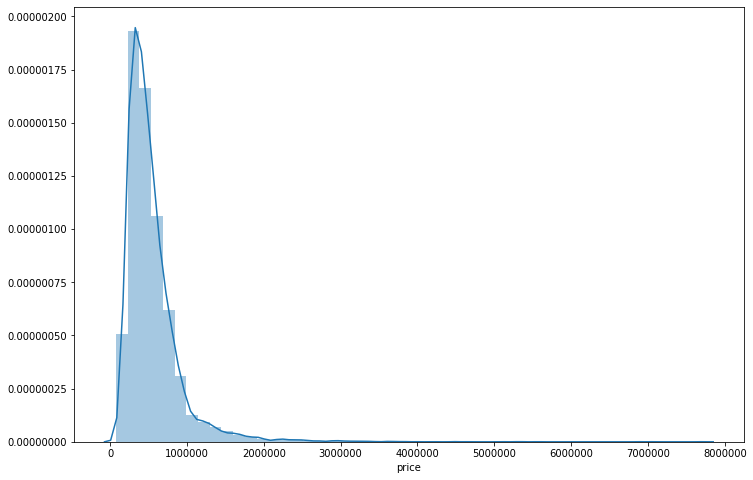

In [9]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

From the above figure we can see that there is a main chunk of price lies between the region 2,00,000 to 10,00,000.

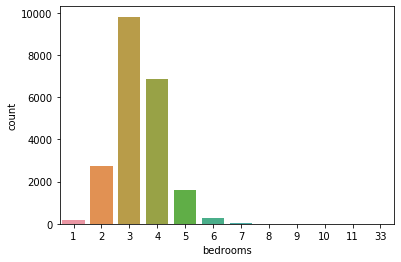

In [10]:
sns.countplot(df['bedrooms'])

Number of Bedrooms is commonly between 2 to 5 but there are outliers also, like one large mansion has 33 bedrooms also.

**Now Checking the Correlation between the features.**

In [11]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

Correlation shows that there is a positive correlation between most of the features with the price and sqft_living is most correlated with price feature.

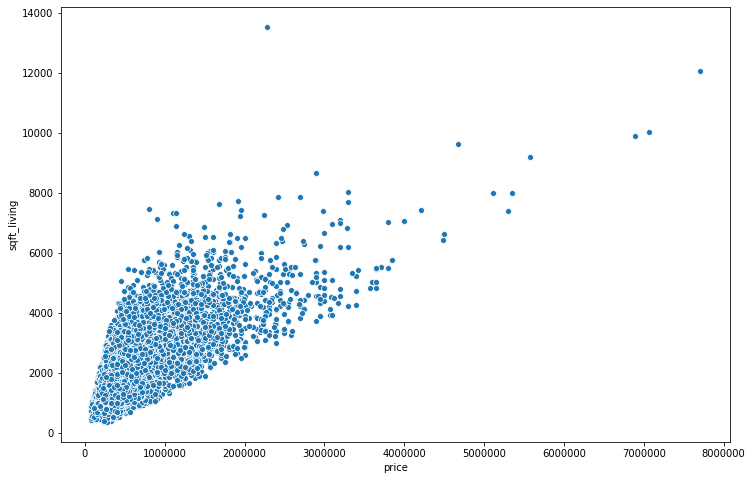

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=df)

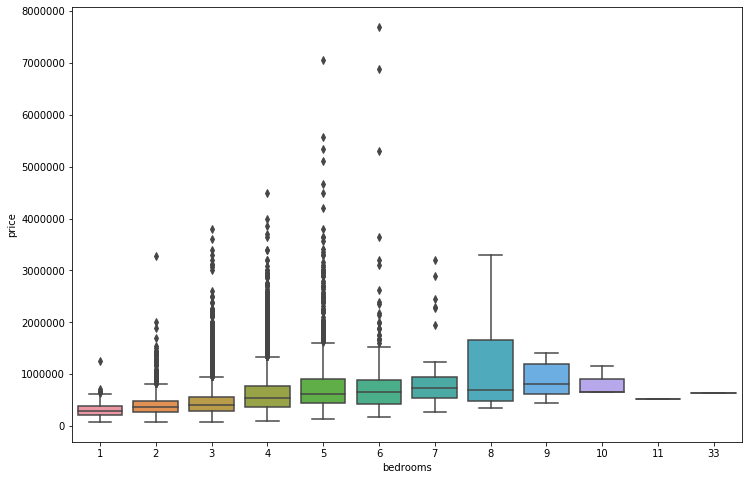

In [14]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

Its obvious from the boxplot as the number of bedrooms increases price also increases.

### Geographical Properties

**Now lets look where are the most expensive Properties are located in King County -**

<img src="kingcounty.png">

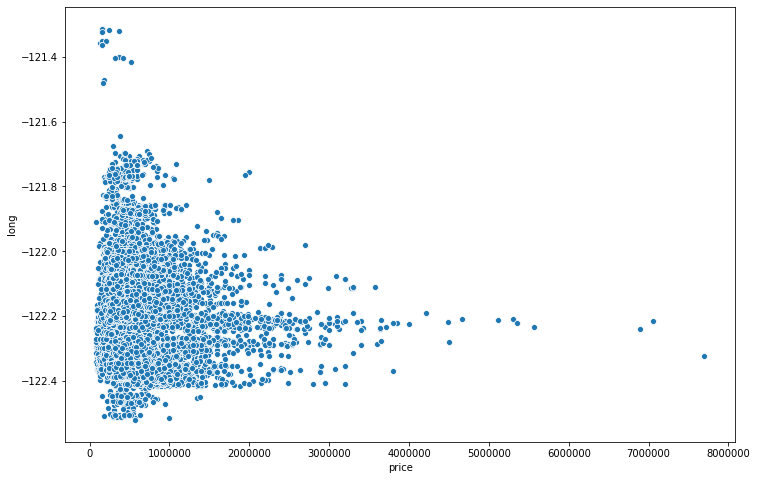

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

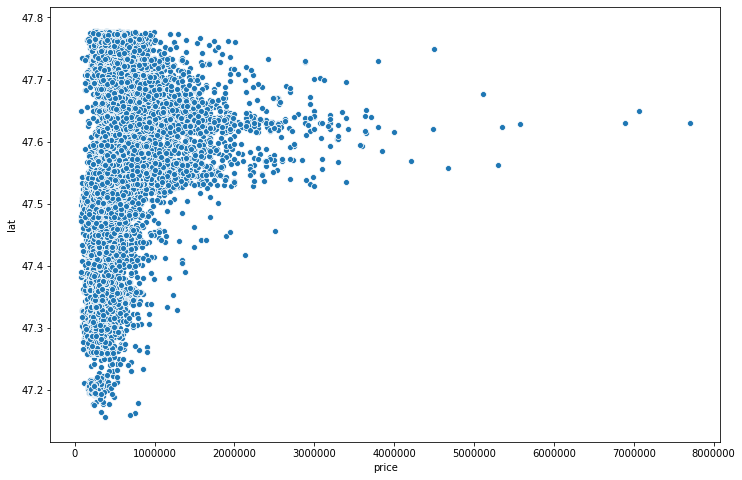

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

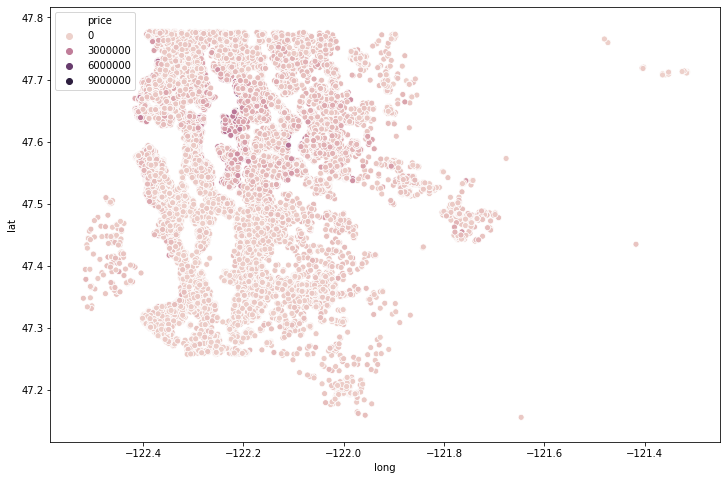

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

Because of the extreme outliers we cannot properly distinguish between the pricing of the data points.So now we will remove the outliers to make the proper visualisation of expensive houses data points.

In [14]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Removing the top 1% (EXEPENSIVE HOUSES).

In [15]:
len(df)*(0.01)

215.97

Dealing with the bottom 99% of houses.

In [16]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

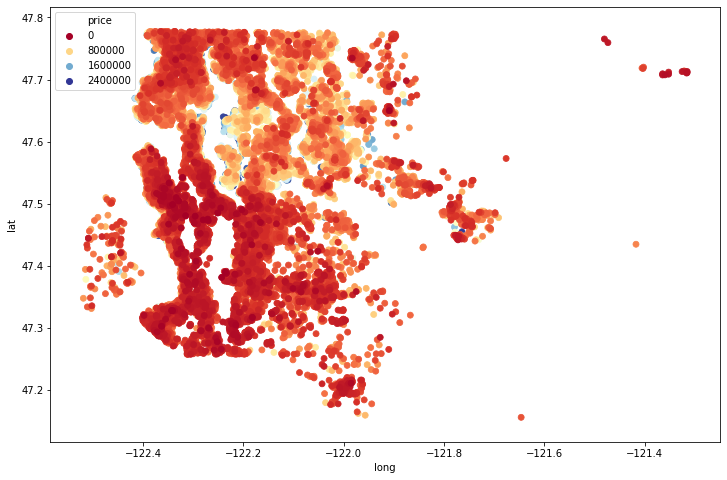

In [17]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',
                data=non_top_1_perc,hue='price',
                palette='RdYlBu',edgecolor=None)

From the plot we can see that the house around (-122,47.6) are relatievly more expensive(light coloured data points) than others,may be as they have waterfronts along with.

### Checking the Waterfront Factor -

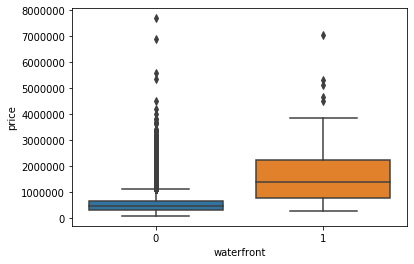

In [18]:
sns.boxplot(x='waterfront',y='price',data=df)

So if the house is having having waterfront,its price will be higher.

## Working with Feature Data 

**Now we will pre process our dataset and see which columns are important and which are not for our final data modelling.**

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

ID is not relevant so we will drop it.

In [21]:
df = df.drop('id',axis=1)

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Feature Engineering from Date

*Converting date (object) to datetime format so as to extract date,months and year.*

In [23]:
df['date'] = pd.to_datetime(df['date'])

*Making separate columns for month and year.*

In [24]:
df['month'] = df['date'].apply(lambda date:date.month)

In [25]:
df['year'] = df['date'].apply(lambda date:date.year)

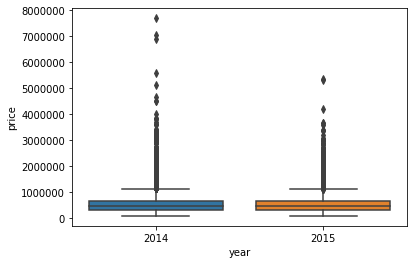

In [26]:
sns.boxplot(x='year',y='price',data=df)

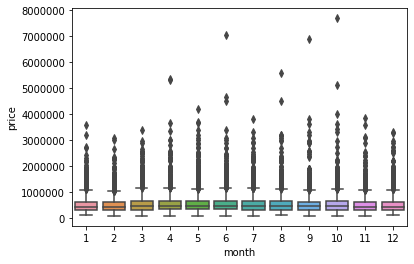

In [27]:
sns.boxplot(x='month',y='price',data=df)

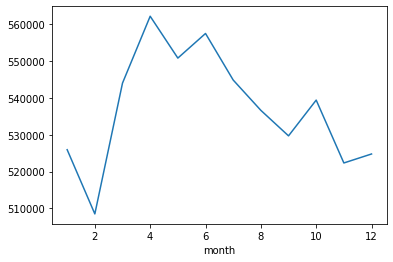

In [28]:
df.groupby('month').mean()['price'].plot()

Here we can see that there is a small spike(as range is small) in prices of house prices sold from March to July.

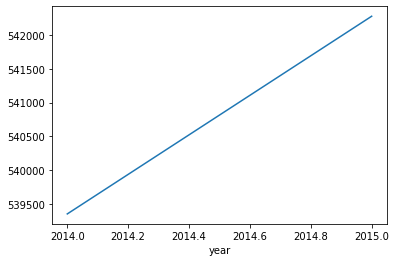

In [29]:
df.groupby('year').mean()['price'].plot()

Here we can say generally due to inflation ,as year passes price has also increased linearly with year.

*Now as we have extracted month and year,so that date(object) column can be dropped.

In [30]:
df = df.drop('date',axis=1)

*Zip code is also a unique representation like ID so it can also be dropped.

In [31]:
df = df.drop('zipcode',axis=1)

In [34]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [33]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


## Scaling and Train Test Split

In [35]:
X = df.drop('price',axis=1)
y = df['price']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

### Scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train= scaler.fit_transform(X_train)

In [41]:
X_test = scaler.transform(X_test)

In [42]:
X_train.shape

(15117, 19)

In [43]:
X_test.shape

(6480, 19)

## Creating a Model

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [45]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1)) 

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [46]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 2s 154us/sample - loss: 430233237119.9238 - val_loss: 418874700271.5654
Epoch 2/400
15117/15117 [==============================] - 1s 35us/sample - loss: 428581404892.0140 - val_loss: 413160446199.7828
Epoch 3/400
15117/15117 [==============================] - 1s 50us/sample - loss: 406025779319.8969 - val_loss: 362424938101.5704
Epoch 4/400
15117/15117 [==============================] - 1s 42us/sample - loss: 304024181460.1226 - val_loss: 208880594104.5728
Epoch 5/400
15117/15117 [==============================] - 1s 46us/sample - loss: 145676438042.5196 - val_loss: 99325146999.4667
Epoch 6/400
15117/15117 [==============================] - 1s 36us/sample - loss: 98950498865.2796 - val_loss: 94326366895.7234
Epoch 7/400
15117/15117 [==============================] - 1s 36us/sample - loss: 96551044225.9898 - val_loss: 92572394351.8815
Epoch 8/400
15117/15117 [====================

15117/15117 [==============================] - 1s 41us/sample - loss: 32798856413.7075 - val_loss: 31343913814.5975
Epoch 128/400
15117/15117 [==============================] - 1s 46us/sample - loss: 32754213015.4629 - val_loss: 31310080925.3926
Epoch 129/400
15117/15117 [==============================] - 1s 44us/sample - loss: 32693444959.1554 - val_loss: 31251819345.5407
Epoch 130/400
15117/15117 [==============================] - 1s 41us/sample - loss: 32682140796.2998 - val_loss: 31226691103.6049
Epoch 131/400
15117/15117 [==============================] - 1s 41us/sample - loss: 32644774899.3329 - val_loss: 31157325631.8420
Epoch 132/400
15117/15117 [==============================] - 1s 46us/sample - loss: 32582816230.0901 - val_loss: 31278884469.5704
Epoch 133/400
15117/15117 [==============================] - 1s 45us/sample - loss: 32596977315.8928 - val_loss: 31100967220.4642
Epoch 134/400
15117/15117 [==============================] - 1s 44us/sample - loss: 32549689511.9910 - v

15117/15117 [==============================] - 1s 41us/sample - loss: 30407531170.2671 - val_loss: 28478360699.8914
Epoch 254/400
15117/15117 [==============================] - 1s 41us/sample - loss: 30426327565.9541 - val_loss: 28476794005.1753
Epoch 255/400
15117/15117 [==============================] - 1s 55us/sample - loss: 30371038283.9346 - val_loss: 28436928572.6815
Epoch 256/400
15117/15117 [==============================] - 1s 40us/sample - loss: 30362722665.6210 - val_loss: 28441041669.6889
Epoch 257/400
15117/15117 [==============================] - 1s 42us/sample - loss: 30358396751.6094 - val_loss: 28443978446.0642
Epoch 258/400
15117/15117 [==============================] - 1s 48us/sample - loss: 30358933663.0495 - val_loss: 28478919070.6568
Epoch 259/400
15117/15117 [==============================] - 1s 42us/sample - loss: 30340011974.5579 - val_loss: 28396329207.7827
Epoch 260/400
15117/15117 [==============================] - 1s 42us/sample - loss: 30328631538.5031 - v

15117/15117 [==============================] - 1s 41us/sample - loss: 28684772621.6662 - val_loss: 26408875096.4938
Epoch 380/400
15117/15117 [==============================] - 1s 45us/sample - loss: 28639535277.8165 - val_loss: 26528884387.0815
Epoch 381/400
15117/15117 [==============================] - 1s 59us/sample - loss: 28675217790.4505 - val_loss: 26420178463.6049
Epoch 382/400
15117/15117 [==============================] - 1s 43us/sample - loss: 28646549534.2113 - val_loss: 26442221123.0025
Epoch 383/400
15117/15117 [==============================] - 1s 44us/sample - loss: 28632792252.2448 - val_loss: 26386360603.1802
Epoch 384/400
15117/15117 [==============================] - 1s 43us/sample - loss: 28620833599.4200 - val_loss: 26309518378.9827
Epoch 385/400
15117/15117 [==============================] - 1s 52us/sample - loss: 28589375353.3362 - val_loss: 26343627505.4617
Epoch 386/400
15117/15117 [==============================] - 1s 43us/sample - loss: 28551403774.8315 - v

In [50]:
pd.DataFrame(model.history.history)

,loss,val_loss
0,4.302332e+11,4.188747e+11
1,4.285814e+11,4.131604e+11
2,4.060258e+11,3.624249e+11
3,3.040242e+11,2.088806e+11
4,1.456764e+11,9.932515e+10
...,...,...
395,2.843967e+10,2.604048e+10
396,2.841387e+10,2.606301e+10
397,2.834828e+10,2.603949e+10
398,2.835460e+10,2.599075e+10


In [47]:
losses = pd.DataFrame(model.history.history)

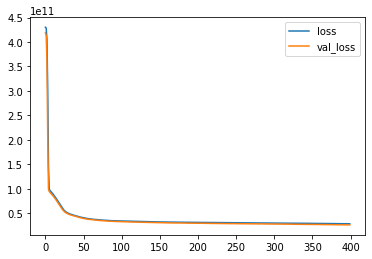

In [48]:
losses.plot()

The plot shows that there no overfitting in our model as the loss and val_loss is pretty much moving along with each other.

# Evaluation on Test Data

In [51]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

#### Predicting on TEST set

In [56]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.1,0.08,0.042399,0.004695,0.0,0.0,0.0,0.75,0.3,0.054594,0.000000,0.208696,0.0,0.875181,0.181894,0.313371,0.008877,0.636364,0.0
1,0.3,0.36,0.172699,0.005134,0.0,0.0,0.0,0.75,0.5,0.118509,0.161826,0.643478,0.0,0.820492,0.277409,0.356393,0.009937,0.818182,0.0
2,0.2,0.24,0.125129,0.002114,0.0,0.0,0.0,0.75,0.4,0.055925,0.163900,0.078261,0.0,0.838025,0.122924,0.163655,0.005471,0.909091,0.0
3,0.1,0.08,0.057911,0.003550,0.0,0.0,0.0,0.75,0.4,0.074567,0.000000,0.347826,0.0,0.861509,0.164452,0.134400,0.006672,0.545455,0.0
4,0.2,0.16,0.113754,0.005482,0.0,0.0,0.0,0.50,0.4,0.121172,0.039419,0.356522,0.0,0.880328,0.176910,0.170539,0.010392,0.272727,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6475,0.3,0.44,0.314374,0.020849,0.4,0.0,0.0,0.75,0.6,0.279627,0.195021,0.800000,0.0,0.487534,0.428571,0.352951,0.044766,0.272727,1.0
6476,0.2,0.16,0.086867,0.002835,0.0,0.0,0.0,1.00,0.3,0.111851,0.000000,0.600000,0.0,0.330706,0.358804,0.124075,0.005296,0.090909,1.0
6477,0.1,0.08,0.055843,0.002593,0.0,0.0,0.0,0.75,0.4,0.071904,0.000000,0.200000,0.0,0.639698,0.117940,0.180864,0.005063,1.000000,0.0
6478,0.3,0.20,0.222337,0.004046,0.0,0.0,0.5,1.00,0.4,0.118509,0.261411,0.478261,0.0,0.526942,0.271595,0.337463,0.007745,0.090909,1.0


In [57]:
predictions = model.predict(X_test)

In [58]:
mean_absolute_error(y_test,predictions)

99012.54534866898

In [59]:
np.sqrt(mean_squared_error(y_test,predictions))

161403.27233184746

In [60]:
explained_variance_score(y_test,predictions)

0.8042184252048175

In [61]:
df['price'].mean()

540296.5735055795

In [62]:
df['price'].median()

450000.0

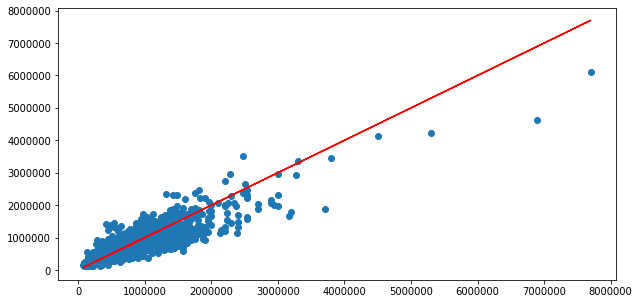

In [66]:
plt.figure(figsize=(10,5))
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

**Because there are some outliers (expensive houses on right side) our absolute mean error is around 1,00,000 compared to mean price 5,40,296.
But for the moment if we remove that outliers we can see in the plot that regreesion line is in sync with the data points till 3,00,000.**

-------------
### Predicting on a brand new house

In [67]:
single_house = df.drop('price',axis=1).iloc[0]

In [68]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [69]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [70]:
model.predict(single_house)

array([[268596.38]], dtype=float32)